<a href="https://colab.research.google.com/github/mrunalkute/DS-Machine-Learning-Assignments/blob/Homework/EDA_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [ ]:
#Cloned assignment
! git clone https://github.com/ds3001f25/eda_assignment.git

Cloning into 'eda_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 799.41 KiB | 9.52 MiB/s, done.


In [ ]:
#Question 2.1: Load the CSV
#import pandas as pd + upload the csv
import pandas as pd
df = pd.read_csv("./eda_assignment/data/airbnb_hw.csv")

In [ ]:
#Question 2.2: Data Dimensions

# Dimensions & variables
print("Shape (rows, cols):", df.shape) #print this
print("Columns:", list(df.columns))

df.head() #prints the first few rows for visualizations

Shape (rows, cols): (30478, 13)
Columns: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
#Question 2.3: CrossTabulation
crosstab = pd.crosstab(df["Room Type"], df["Property Type"])
display(crosstab)

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


Question 2.2

It seems like the most options for the private room are generally in a house, loft, or bed & breakfast. This generally makes sense; more often, children and individual members may have their own room in homes. For the shared room options, house and loft were generally the most available. For some property types, such as Bed & Breakfasts, private rooms are more common than entire property rentals. This reflects the shared-space nature of those accommodations, while apartments and houses are more often rented out as entire units.

<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2146861733.py:9: SyntaxWarning: invalid escape sequence '\$'
  df["Price"] = df["Price"].replace('[\$,]', '', regex=True).astype(float)


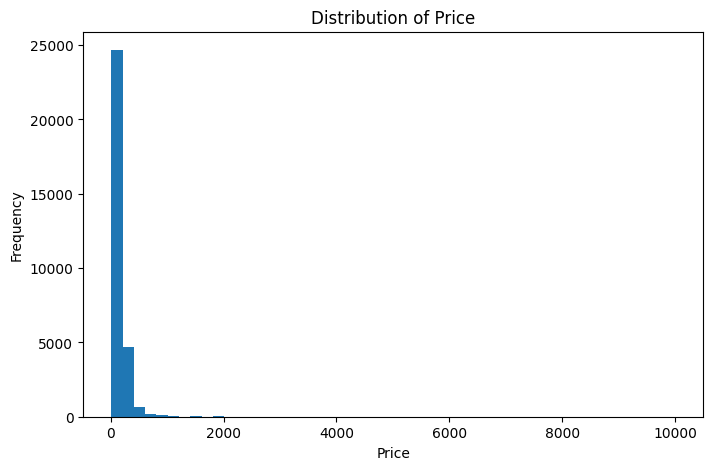

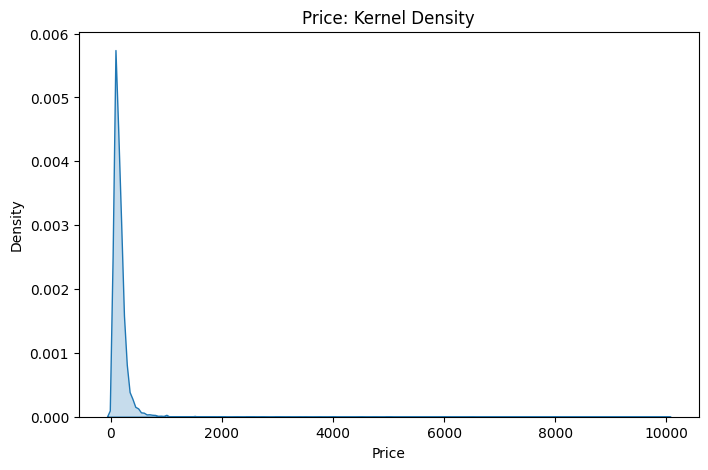

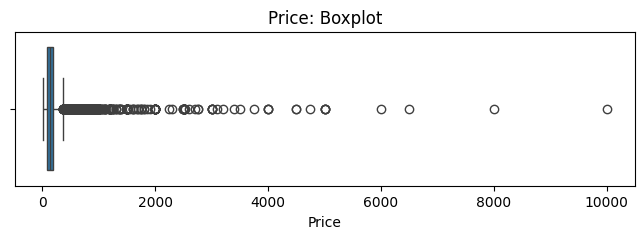

Mean:    163.58973685937397
Median:  125.0
Mode:    [150.0]


In [ ]:
#Question 2.4: Price Variable

#We need this to start the statistical analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert Price to numeric (I opened the data and it looks a little wierd so I am just making sure that the data is "clean")
df["Price"] = df["Price"].replace('[\$,]', '', regex=True).astype(float)

# Histogram
plt.figure(figsize=(8,5))
df["Price"].hist(bins=50, grid=False)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Kernel Density
plt.figure(figsize=(8,5))
sns.kdeplot(df["Price"].dropna(), fill=True) #using dropna in case there are any missing values
#label and make it pretty!
plt.title("Price: Kernel Density")
plt.xlabel("Price")
plt.show()

# Boxplot
plt.figure(figsize=(8,2))
sns.boxplot(x=df["Price"].dropna()) #using dropna in case there are any missing values
#label and make it pretty!
plt.title("Price: Boxplot")
plt.xlabel("Price")
plt.show()

# Statistical Description of Variable
print("Mean:   ", df["Price"].mean())
print("Median: ", df["Price"].median())
print("Mode:   ", list(df["Price"].mode()))

Question 2.4:

Looking at the "Price" variable boxplot, I would say that the data has plenty of outliers. Usually when you observe outliers you see them outside of the 75th percentile, beyond the whisker, beyond it's IQR and here, I see many. I would also argue that the data is heavily skewed, as seen in the KDE and histogram where it is right skewed; upon taking a look at the statistical information, the mean > median which explains it's skew.

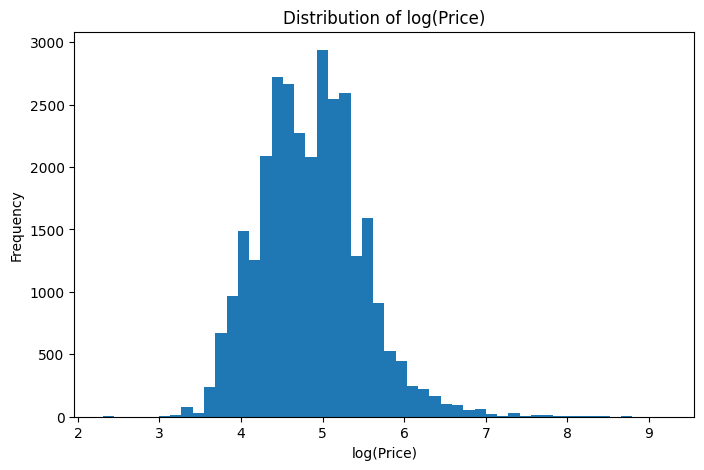

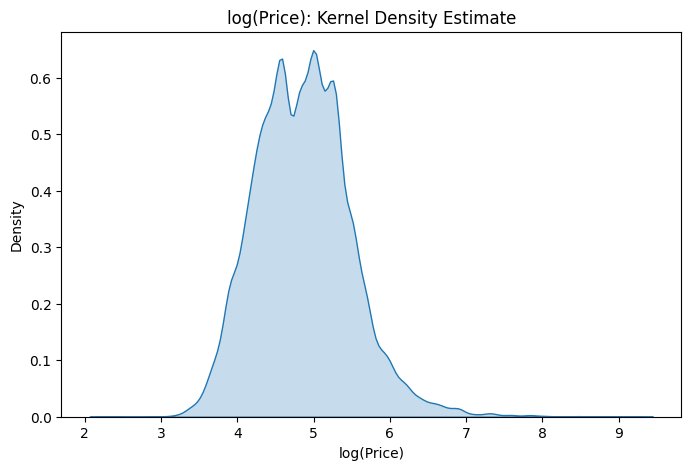

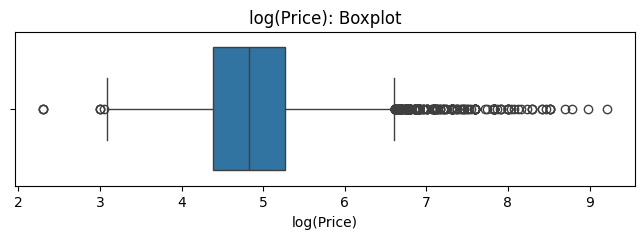

Mean (log):    4.860494597156509
Median (log):  4.8283137373023015
Mode (log):    [5.0106352940962555]


In [ ]:
# Question 2.4: "Price_log" variable
# Create log-transformed price (avoid log(0))
df["price_log"] = np.log(df["Price"].clip(lower=1))

# Histogram
plt.figure(figsize=(8,5))
df["price_log"].hist(bins=50, grid=False)
plt.title("Distribution of log(Price)")
plt.xlabel("log(Price)")
plt.ylabel("Frequency")
plt.show()

# KDE
plt.figure(figsize=(8,5))
sns.kdeplot(df["price_log"].dropna(), fill=True)
plt.title("log(Price): Kernel Density Estimate")
plt.xlabel("log(Price)")
plt.show()

# Boxplot
plt.figure(figsize=(8,2))
sns.boxplot(x=df["price_log"].dropna())
plt.title("log(Price): Boxplot")
plt.xlabel("log(Price)")
plt.show()

# Stats
print("Mean (log):   ", df["price_log"].mean())
print("Median (log): ", df["price_log"].median())
print("Mode (log):   ", list(df["price_log"].mode()))

Question 2.4:
This appears much less skewed and the data looks more normal. With the boxplot, I will not that there are still plenty of outliers present. However, I will note that the data has been scaled more properly with the "price_log" variable.

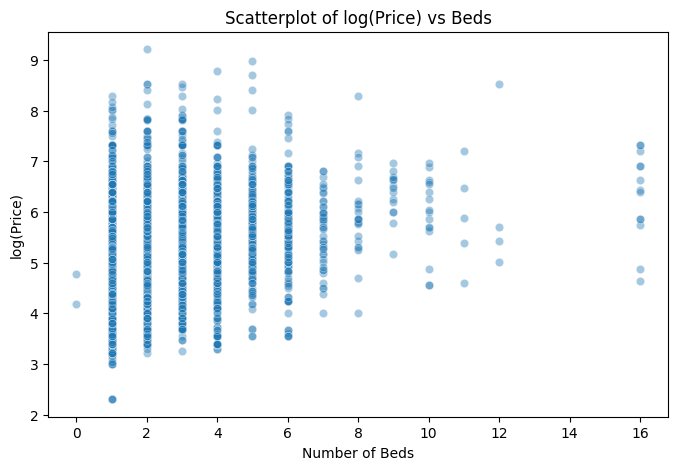

,Beds,count,mean,median,std
0,0.0,2,92.000000,92.0,38.183766
1,1.0,20344,127.673810,100.0,107.047827
2,2.0,6610,199.061271,160.0,225.706318
3,3.0,2071,268.118300,200.0,303.106942
4,4.0,783,315.332056,247.0,353.184402
5,5.0,284,411.500000,290.0,672.610659
6,6.0,177,401.768362,275.0,417.018431
7,7.0,45,341.377778,300.0,220.116631
8,8.0,24,589.041667,350.0,793.054934
9,9.0,15,618.000000,650.0,233.649616


In [ ]:
# Question 2.5: Scatterplot of "price_log" and "Beds"
# Scatterplot of log(Price) vs Beds
plt.figure(figsize=(8,5))
sns.scatterplot(x="Beds", y="price_log", data=df, alpha=0.4)
#Add labels and make it pretty
plt.title("Scatterplot of log(Price) vs Beds")
plt.xlabel("Number of Beds")
plt.ylabel("log(Price)")
plt.show()

# Groupby Beds summary of Price
beds_summary = df.groupby("Beds")["Price"].agg(["count","mean","median","std"]).reset_index()
beds_summary.head(10)

Question 2.5:

Based off the scatterplot, it seems as though verage price steadily increases with the number of beds. There is about about 128 dollars for 1-bed units, around 199 dollars for 2-beds, and climbing above 600 dollars for listings with 9 beds. This shows a clear upward trend in mean price as properties get larger. Standard deviation also increases with bed coun. This indicates that larger properties are not only more expensive on average but also far more variable in price, reflecting a mix ofsmaller multi-bedroom apartments and high-end luxury homes. In conclusion, more beds equals higher average prices and much greater price variability.


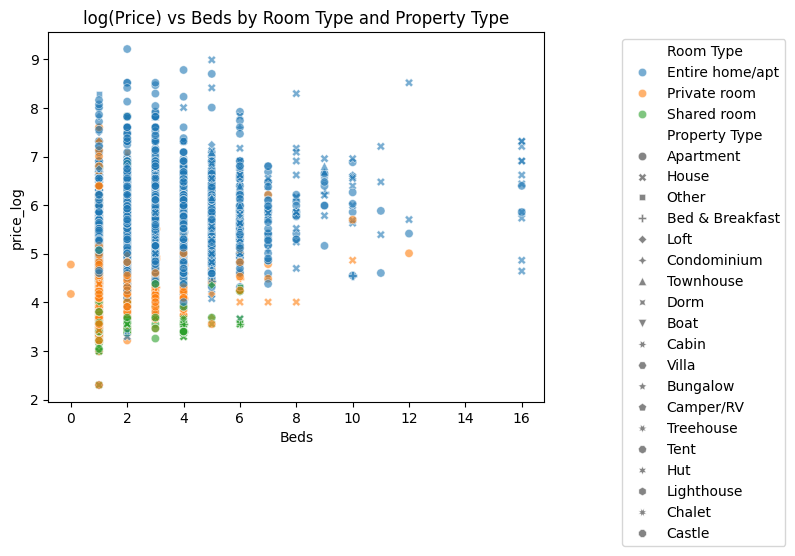

,Room Type,Property Type,count,mean,median,std
11,Entire home/apt,Other,14,843.428571,300.0,1133.062271
13,Entire home/apt,Villa,4,529.750000,249.5,650.963581
10,Entire home/apt,Loft,392,330.510204,225.0,321.519721
6,Entire home/apt,Condominium,72,304.861111,200.0,266.197497
8,Entire home/apt,House,752,297.263298,195.0,468.409428
12,Entire home/apt,Townhouse,83,280.783133,190.0,314.605252
4,Entire home/apt,Cabin,1,250.000000,250.0,NaN
0,Entire home/apt,Apartment,15669,213.224839,175.0,218.097834
26,Private room,Other,29,211.931034,119.0,235.404505
1,Entire home/apt,Bed & Breakfast,13,184.538462,130.0,119.814172


In [ ]:
#Question 2.6

#Name all of the variables
var1 = "Beds"          # x-axis
var2 = "price_log"     # y-axis
cat1 = "Room Type"     # categorical variable
cat2 = "Property Type" # categorical variable

#This was borrowed from the notes directly!
this_plot = sns.scatterplot(
    data=df,
    x=var1,
    y=var2,
    hue=cat1,
    style=cat2,
    alpha=0.6
)
this_plot.set(title="log(Price) vs Beds by Room Type and Property Type") #title

# Move legend so that we can see the graph
sns.move_legend(this_plot, "upper right", bbox_to_anchor=(1.5, 1))
plt.show()

#Grouped Summary
rp_summary = (
    df.groupby(["Room Type","Property Type"])["Price"]
      .agg(["count","mean","median","std"])
      .reset_index()
      .sort_values("mean", ascending=False)
)
rp_summary.head(10)  # top 10 by mean

Question 2.6:

The scatterplot shows that entire homes and apartments are generally priced higher than private or shared rooms. As the number of beds increases, prices also rise, though there is wide variation at each bed count. Certain property types such as Villas, Lofts, and Houses tend to cluster toward the higher end of the price range. The grouped summary reveals that “Other” entire-home listings have the highest mean price at around 843 dollars, followed by Villas at about 530 dollars. Because these averages are pulled upward by luxury outliers, the median provides a more reliable measure of central tendency for this dataset.

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [ ]:
# Question 3.1
#Load the csv for drilling data
df_1 = pd.read_csv("./eda_assignment/data/drilling_rigs.csv")

#Observations
print("Shape (rows, cols):", df_1.shape)
print("\nColumn names:\n", df_1.columns.tolist())

print("Observations (rows):", df_1.shape[0])
print("Variables (columns):", df_1.shape[1])

df_1.head()

#I want to use this "info" function to determine the type of variables I am working with
df_1.info()

Shape (rows, cols): (623, 10)

Column names:
 ['Month', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)', 'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)', 'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)', 'Active Well Service Rig Count (Number of Rigs)']
Observations (rows): 623
Variables (columns): 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                   

Question 3.1:

The drilling_rigs dataset has 623 observations and 10 variables. Three columns (Onshore, Offshore, and Total rigs) were already stored as numeric, but several variables that should be numeric were imported as objects. These include the crude oil total, natural gas total, horizontal, directional, vertical trajectory counts, and the active well service rig count. Cleaning will therefore require typecasting these object columns into numeric types.

In [ ]:
# Question 3.2

df_1["time"] = pd.to_datetime(df_1["Month"], format="mixed", errors="coerce")

#Check the data
df_1[["Month","time"]].head()


,Month,time
0,1973 January,1973-01-01
1,1973 February,1973-02-01
2,1973 March,1973-03-01
3,1973 April,1973-04-01
4,1973 May,1973-05-01


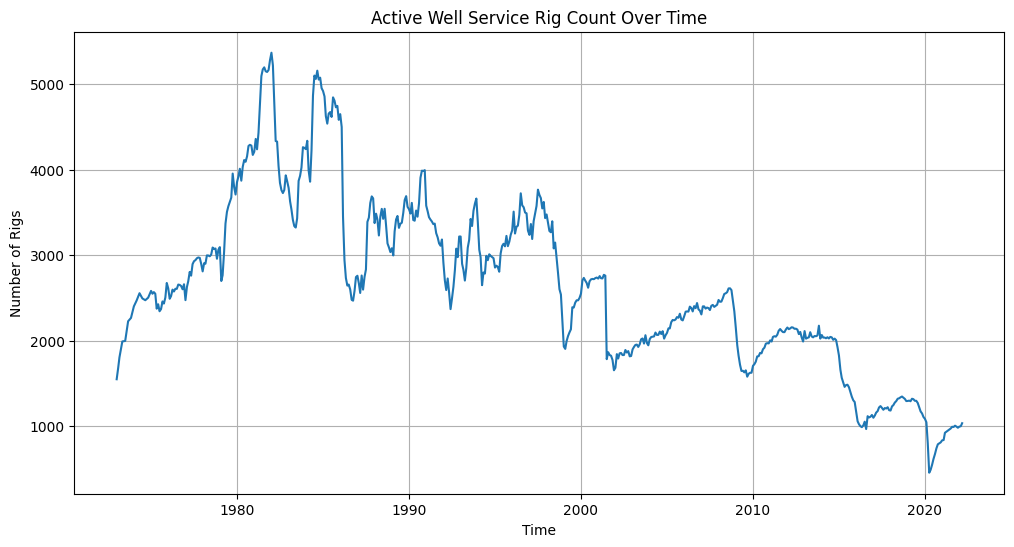

In [ ]:
# Question 3.3

# Convert rig count column to numeric (it was being really weird when I plotted as was so I thought maybe we should convert numeric)
df_1["Active Well Service Rig Count (Number of Rigs)"] = pd.to_numeric(
    df_1["Active Well Service Rig Count (Number of Rigs)"], errors="coerce"
)

# Sort by time
df_1 = df_1.sort_values("time")

# Line plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_1,
    x="time",
    y="Active Well Service Rig Count (Number of Rigs)"
)

#Make it pretty!
plt.title("Active Well Service Rig Count Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Rigs")
plt.grid(True)
plt.show()

Question 3.3

The line plot of the Active Well Service Rig Count shows a cyclical pattern over time, with periods of growth followed by sharp declines. Towards 2020 the number of rigs shows a complete steep decline which is different from the 1980s and 1990s. Without assuming the cause, off the top of my head, this could potentially be due the COVID-19 pandemic that happened in 2020, the very steep drop.

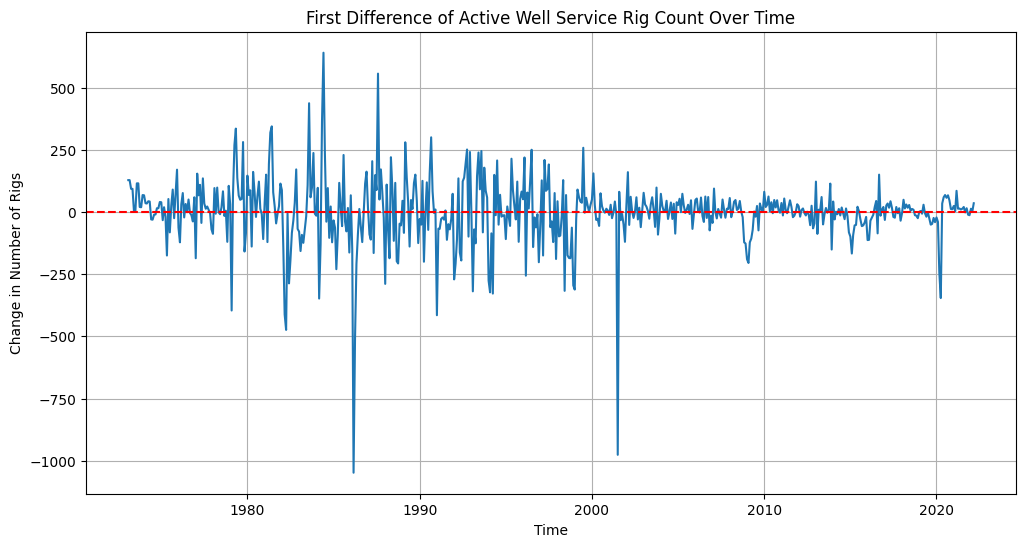

In [ ]:
# Question 3.4

# Compute first difference
df_1["rig_diff"] = df_1["Active Well Service Rig Count (Number of Rigs)"].diff()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_1, x="time", y="rig_diff")
#Make it pretty!
plt.title("First Difference of Active Well Service Rig Count Over Time")
plt.xlabel("Time")
plt.ylabel("Change in Number of Rigs")
plt.axhline(0, color="red", linestyle="--")  #I made the reference line at 0
plt.grid(True)
plt.show()

Question 3.4:

This graph varies for the lineplot we had for Question 3.3. It seems to oscillate showing how the number of rigs changes from month to month. Most changes are relatively small, but there are sharp negative spikes during downturns, which could correspond to rapid pullbacks in drilling activity.

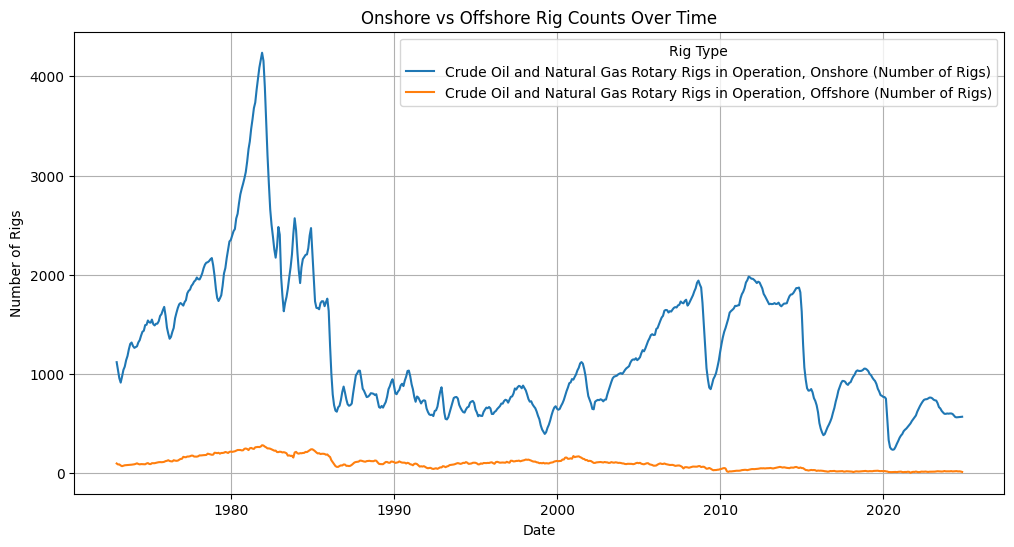

In [ ]:
# Question 3.5

# Melt the onshore and offshore columns
df_melted = df_1.melt(
    id_vars="time",
    value_vars=[
        "Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",
        "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"
    ],
    var_name="Rig Type",
    value_name="Rig Count"
)

# Line plot of the melted data to visualize it all together, make it look pretty!!
plt.figure(figsize=(12,6))
sns.lineplot(data=df_melted, x="time", y="Rig Count", hue="Rig Type")
plt.title("Onshore vs Offshore Rig Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Rigs")
plt.grid(True)
plt.show()